## Final Project Submission

Please fill out:
* Student name: Caleb Harris
* Student pace: full time
* Scheduled project review date/time: 3/11
* Instructor name: Parveen Gowtham
* Blog post URL: 


In [385]:
# Install pandas package for python
pip install pandas

SyntaxError: invalid syntax (1504436982.py, line 2)

In [9]:
pip install matplotlib

     |████████████████████████████████| 7.2 MB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.7 MB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 59 kB 762 kB/s eta 0:00:01
     |████████████████████████████████| 895 kB 30.5 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [384]:
# Install seaborn for python vizualisation 
pip install seaborn

SyntaxError: invalid syntax (1978589429.py, line 2)

In [386]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy 
import seaborn as sns

In [107]:
movie_gross_df = pd.read_csv('/Users/calebharris/Documents/course_materials/project1/dsc-phase-1-project-v2-3/zippedData/bom.movie_gross.csv')

# RETURN ON STUDIO INVESTMENT METRIC

In [131]:
# Load data frame in containing production budget and worldwide gross data.
numbers_df = pd.read_csv('/Users/calebharris/Documents/course_materials/project1/dsc-phase-1-project-v2-3/zippedData/tn.movie_budgets.csv')
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [417]:
# Examine how many records have a worldwide_gross equal to '$0'

numbers_df.loc[movie_budgets['worldwide_gross'] == '$0']

,Movie,production_budget,worldwide_gross


In [137]:
# Clean numbers_df and change production_budget and worldwide_gross to an int data type
numbers_df[['production_budget', 'worldwide_gross'
    ]] = numbers_df[['production_budget', 'worldwide_gross'
    ]].replace({'\$' : '', ',' : ''
    }, regex = True).astype('int')

In [419]:
# Drop irrelevant columns
# Rename column names to be more relevant

numbers_df.drop(['id', 'release_date', 'domestic_gross' ], axis = 1, inplace = True)

numbers_df.rename(columns = {'production_buget' : 'Budgets', 'wordwide_gross' : 'TotalGross',
'movie' : 'Movie'}, inplace = True)


KeyError: "['id', 'release_date', 'domestic_gross'] not found in axis"

In [ ]:
# Drop all rows containg a 0 value in worldwide gross column

numbers_df = numbers_df[numbers_df['worldwide_gross'] != 0]

In [528]:
# Verify no 0 values remain

numbers_df.loc[numbers_df['worldwide_gross'] == 0]

,Movie,production_budget,worldwide_gross


In [158]:
# Examine movie_gross_df to evaluate which columns of data are relevant to my business questions.
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [159]:
# Dropping unnecessary columns
movie_gross_df.drop(['domestic_gross', 'foreign_gross', 'year'], axis = 1, inplace = True)

In [162]:
# Rename columns to make common column to merge on
movie_gross_df.rename(columns = {'title' : 'Movie'}, inplace = True)
movie_gross_df

,Movie,studio
0,Toy Story 3,BV
1,Alice in Wonderland (2010),BV
2,Harry Potter and the Deathly Hallows Part 1,WB
3,Inception,WB
4,Shrek Forever After,P/DW
...,...,...
3382,The Quake,Magn.
3383,Edward II (2018 re-release),FM
3384,El Pacto,Sony
3385,The Swan,Synergetic


In [166]:
# Join numbers_df and movie_gross_df on Movie column.

metric_by_studio_df = pd.merge(numbers_df, movie_gross_df, on = 'Movie', how = 'inner')

In [476]:
# Examine newly created data frame
metric_by_studio_df.head(3)

,Movie,production_budget,worldwide_gross,studio
0,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,BV
1,Avengers: Age of Ultron,330600000,1403013963,BV
2,Avengers: Infinity War,300000000,2048134200,BV


In [425]:
metric_by_studio_df.tail(3)

,Movie,production_budget,worldwide_gross,studio
1240,The Gallows,100000,41656474,WB (NL)
1241,A Ghost Story,100000,2769782,A24
1242,Tiny Furniture,50000,424149,IFC


In [219]:
# Examine the number of movies each studio has made
metric_by_studio_df['studio'].value_counts().sort_values(ascending = False)

Uni.     117
Fox      110
WB       102
Par.      74
Sony      74
        ... 
Trib.      1
Kino       1
BBC        1
ELS        1
DR         1
Name: studio, Length: 99, dtype: int64

In [533]:
# Update the roi_by_studio_df so that the ['worldwide_gross'] column is descending

roi_by_studio_df = roi_by_studio_df.sort_values(['worldwide_gross'], ascending = False)
roi_by_studio_df

,index,studio,production_budget,worldwide_gross,movies_by_studio,roi_by_studio
13,13,BV,9450800000,33286017937,72,3.522032
8,8,Uni.,6597700000,27329288200,117,4.142245
16,16,Fox,7755500000,26795813328,110,3.455072
29,29,WB,8197700000,22193811969,102,2.707322
15,15,Sony,5050500000,17601810459,74,3.485162
...,...,...,...,...,...,...
94,94,IVP,2000000,102645,1,0.051323
98,98,KE,18000000,94953,1,0.005275
97,97,First,9000000,85527,1,0.009503
90,90,DR,400000,44452,1,0.111130


In [234]:
roi_by_studio_df.reset_index()


,studio,production_budget,worldwide_gross
0,BV,9450800000,33286017937
1,Uni.,6597700000,27329288200
2,Fox,7755500000,26795813328
3,WB,8197700000,22193811969
4,Sony,5050500000,17601810459
...,...,...,...
94,IVP,2000000,102645
95,KE,18000000,94953
96,First,9000000,85527
97,DR,400000,44452


In [427]:
# Add a column 'movies_by_studio' that contains a count of the number of movies produced by a specific studio

roi_by_studio_df['movies_by_studio'] = metric_by_studio_df['studio'].value_counts().sort_values(ascending = False)
roi_by_studio_df

,production_budget,worldwide_gross,movies_by_studio
studio,,,
3D,5000000,16515203,1
A24,143100000,400005443,21
ALP,26000000,2923959,1
ATO,12500000,2272186,1
Affirm,7000000,31471492,2
...,...,...,...
WB,8197700000,22193811969,102
WB (NL),2148600000,8540864247,37
WHE,7000000,382946,1


In [428]:
# Create new column labeled ['roi_by_studio'] which is a metric that measures a studio's track record on money
# spent on budget vs money grossed

ww_gross = roi_by_studio_df['worldwide_gross']
prod_budg = roi_by_studio_df['production_budget']

roi_by_studio_df['roi_by_studio'] = ww_gross / prod_budg 

In [462]:
roi_by_studio_df = roi_by_studio_df.sort_values(['roi_by_studio'], ascending = False)
roi_by_studio_df.reset_index(inplace = True)

In [435]:
# Create a new data frame for studios which have produced 5 films or fewer. 
# This helps group roi_by_studio into a new group with similar film history. I will not use this dataframe in my presentation.

roi_by_studio_one_five_movie_df = roi_by_studio_df[roi_by_studio_df['movies_by_studio'] <= 5]
roi_by_studio_one_five_movie_df

,production_budget,worldwide_gross,movies_by_studio,roi_by_studio
studio,,,,
UTV,21400000,306434791,3,14.319383
Orch.,2500000,23845533,1,9.538213
GrtIndia,30000000,263502914,1,8.783430
Eros,37000000,206015876,4,5.567997
Neon,11000000,53797409,1,4.890674
...,...,...,...,...
IVP,2000000,102645,1,0.051323
Alc,10000000,161097,1,0.016110
BBC,600000,7943,1,0.013238


In [463]:
# Change index so that 'studio' is column
roi_by_studio_one_five_movie_df.reset_index(inplace = True)

In [398]:
# New group of studios with high count of movies produced, studios found in this data frame have produced more than
# five movies. I will use this dataframe in my presentation.
roi_by_studio_high_count_movie_df = roi_by_studio_df[roi_by_studio_df['movies_by_studio'] > 5]
roi_by_studio_high_count_movie_df.reset_index(inplace = True) 



In [449]:
roi_by_studio_high_count_movie_df


,studio,production_budget,worldwide_gross,movies_by_studio,roi_by_studio
0,FoxS,500380000,2184538620,46,4.365759
1,Uni.,6597700000,27329288200,117,4.142245
2,WB (NL),2148600000,8540864247,37,3.975083
3,P/DW,1334000000,5078027601,10,3.806617
4,BV,9450800000,33286017937,72,3.522032
5,Sum.,409800000,1438637668,12,3.510585
6,Sony,5050500000,17601810459,74,3.485162
7,Fox,7755500000,26795813328,110,3.455072
8,LGF,2069387650,6983389000,61,3.374616
9,Wein.,838000000,2819991732,41,3.365145


In [430]:
# A preview of the top ten studios ROI with more than 5 movies produced.

roi_by_studio_high_count_movie_df.iloc[:10]

,studio,production_budget,worldwide_gross,movies_by_studio,roi_by_studio
0,FoxS,500380000,2184538620,46,4.365759
1,Uni.,6597700000,27329288200,117,4.142245
2,WB (NL),2148600000,8540864247,37,3.975083
3,P/DW,1334000000,5078027601,10,3.806617
4,BV,9450800000,33286017937,72,3.522032
5,Sum.,409800000,1438637668,12,3.510585
6,Sony,5050500000,17601810459,74,3.485162
7,Fox,7755500000,26795813328,110,3.455072
8,LGF,2069387650,6983389000,61,3.374616
9,Wein.,838000000,2819991732,41,3.365145


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



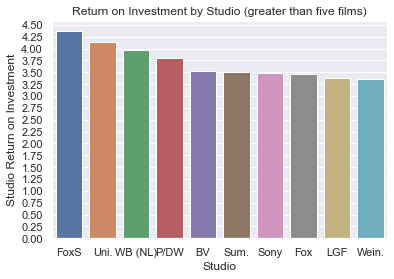

In [475]:
# Graph showing top ten ROI for studios with more than 5 movies produced.
# Five movies was chosen as the cutoff because it contained 32 studios, almost one third of the 99 studios.

x = roi_by_studio_high_count_movie_df.iloc[:10]['studio']
y = roi_by_studio_high_count_movie_df['roi_by_studio']
sns.set()
ax = sns.barplot(x, y, data = roi_by_studio_high_count_movie_df)
plt.title('Return on Investment by Studio (greater than five films)')
plt.xlabel('Studio')
plt.ylabel('Studio Return on Investment')
plt.yticks(np.arange(0.00, 4.6, 0.25));

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



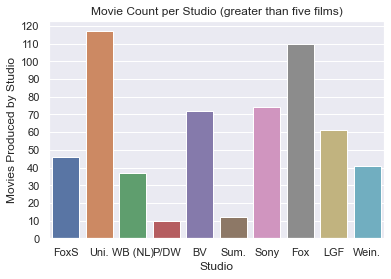

In [473]:
# Graph showing the movie count by studio for the top ten best ROI studios with more than five movies produced.

x = roi_by_studio_high_count_movie_df.iloc[:10]['studio']
y = roi_by_studio_high_count_movie_df['movies_by_studio']
sns.set()
ax = sns.barplot(x, y, data = roi_by_studio_high_count_movie_df)
plt.title('Movie Count per Studio (greater than five films)')
plt.xlabel('Studio')
plt.ylabel('Movies Produced by Studio')
plt.yticks(np.arange(0, 121, 10));

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



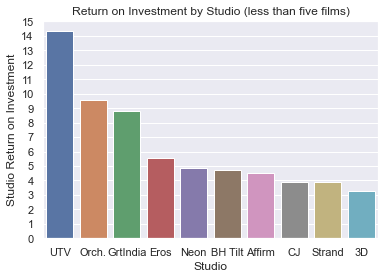

In [546]:
x = roi_by_studio_one_five_movie_df.iloc[:10]['studio']
y = roi_by_studio_one_five_movie_df['roi_by_studio']
sns.set()
ax = sns.barplot(x, y, data = roi_by_studio_one_five_movie_df)
plt.title('Return on Investment by Studio (less than five films)')
plt.xlabel('Studio')
plt.ylabel('Studio Return on Investment')
plt.yticks(np.arange(0.00, 15.1, 1));

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



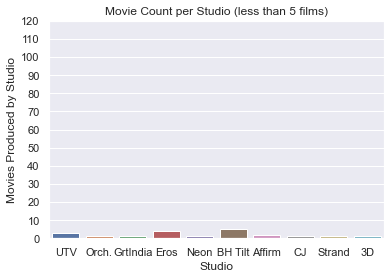

In [472]:
# Graph of the movie count for the ten highest ROI studios with five or less total movies produced. 

x = roi_by_studio_one_five_movie_df.iloc[:10]['studio']
y = roi_by_studio_one_five_movie_df['movies_by_studio']
sns.set()
ax = sns.barplot(x, y, data = roi_by_studio_high_count_movie_df)
plt.title('Movie Count per Studio (less than 5 films)')
plt.xlabel('Studio')
plt.ylabel('Movies Produced by Studio')
plt.yticks(np.arange(0, 121, 10));

# Helpful Graphs and Calculations for presentation

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



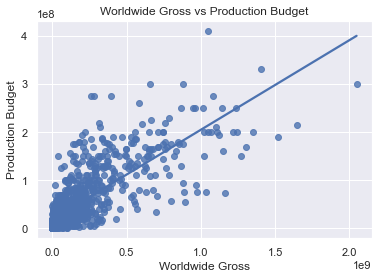

In [537]:
# Scatter plot of worldwide gross vs. production budge. Showing money matters.

x = metric_by_studio_df['worldwide_gross']
y = metric_by_studio_df['production_budget']
sns.set()
ax = sns.regplot(x, y, data = metric_by_studio_df, ci = None)
plt.title('Worldwide Gross vs Production Budget')
plt.xlabel('Worldwide Gross')
plt.ylabel('Production Budget')
plt.yticks(np.arange(0, 500000000, 100000000));

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Production Budget')

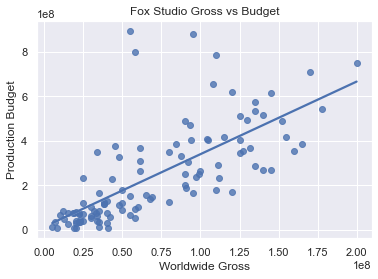

In [538]:
# Fox studio worldwide gross vs. production scatter plot.

x = metric_by_studio_df.loc[metric_by_studio_df['studio'] == 'Fox']['production_budget']
y = metric_by_studio_df.loc[metric_by_studio_df['studio'] == 'Fox']['worldwide_gross']
sns.set()
ax = sns.regplot(x, y, data = metric_by_studio_df, ci = 0)
plt.title('Fox Studio Gross vs Budget')
plt.xlabel('Worldwide Gross')
plt.ylabel('Production Budget')


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Production Budget')

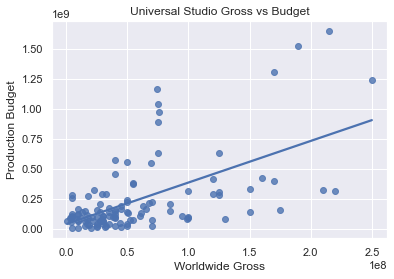

In [539]:
# Universal studio worldwide gross vs production budget scatterplot
x = metric_by_studio_df.loc[metric_by_studio_df['studio'] == 'Uni.']['production_budget']
y = metric_by_studio_df.loc[metric_by_studio_df['studio'] == 'Uni.']['worldwide_gross']
sns.set()
ax = sns.regplot(x, y, data = metric_by_studio_df, ci = 0)
plt.title('Universal Studio Gross vs Budget')
plt.xlabel('Worldwide Gross')
plt.ylabel('Production Budget')

## Studio Production Budget Estimate Calculations

In [540]:
fox_movie_net_budget = metric_by_studio_df.loc[metric_by_studio_df['studio'] == 'Fox']['production_budget'].sum()
fox_studio_movie_count = metric_by_studio_df.loc[metric_by_studio_df['studio'] == 'Fox']['Movie'].count()
fox_movie_net_budget / fox_studio_movie_count

70504545.45454545

In [541]:
uni_net_budget = metric_by_studio_df.loc[metric_by_studio_df['studio'] == 'Uni.']['production_budget'].sum()
uni_studio_movie_count = metric_by_studio_df.loc[metric_by_studio_df['studio'] == 'Uni.']['Movie'].count()
uni_net_budget / uni_studio_movie_count

56390598.29059829